In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
idx = pd.IndexSlice

plotconfig = {
    'style':'.',
    'ylim':(0,2000),
    'xlim':('2018-01-01','2021-01-01'),
    'grid':True,
    'markersize':5,
    'figsize':(20,6)
}

locations = pd.read_csv('csv/locations.csv',index_col='name')
directions = pd.read_csv('csv/directions.csv',index_col='name')

detections = pd.read_csv('csv/detections.csv',index_col=['location','direction','ts'],parse_dates=True).value.sort_index()

def series_for_direction(detections,location,direction):
    return detections.loc[(location, direction)].rename((location, direction))

series = series_for_direction(detections,'Podolské nábřeží - stezka','do centra (Výtoň)')
another = series_for_direction(detections,'Podolské nábřeží - stezka','z centra (Braník)')

# Lecture 7 - Pandas

by Vítek Macháček, inspired by Martin Hronec

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)

* built on top of NumPy
* Most of your python data work will start and many of it will end in Pandas.
* Huge ecosystem that built around 

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data

* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations

* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data

* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects

* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

* Intuitive merging and joining data sets

* Flexible reshaping and pivoting of data sets

* Hierarchical labeling of axes (possible to have multiple labels per tick)

* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format

* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.



## `pd.Series` - labelled 1D object

###  Construction

Series can be created using:
* `dict`


```python 
pd.Series({'Vítek':31,'Martin':30, 'Honza':30})
```

* `list`, `tuple` or `np.array`


```python 
pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in range(10)],name='Age')
```

* scalar

```python
pd.Series(np.nan,index=['Vítek','Martin','Honza'],name='NANs')
```

Main features:

* `values` - collection of measurements, categories etc.
* `name` - column name
* `dtype` - datatype - `int`,`float`,`pd.Timestamp`,`object`
* `shape`

In [5]:
import random
random.random()

0.029321008980874308

In [12]:
series#.plot()

ts
2018-01-01     115.0
2018-01-02     190.0
2018-01-03      72.0
2018-01-04     149.0
2018-01-05     155.0
               ...  
2021-03-23     371.0
2021-03-24     668.0
2021-03-25     971.0
2021-03-26    1142.0
2021-03-27     103.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1182, dtype: float64

`name`

In [13]:
series.name

('Podolské nábřeží - stezka', 'do centra (Výtoň)')

`values`

In [16]:
series.values

array([ 115.,  190.,   72., ...,  971., 1142.,  103.])

`index`

In [17]:
series.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27'],
              dtype='datetime64[ns]', name='ts', length=1182, freq=None)

`dtype`

In [18]:
series.dtype

dtype('float64')

`shape`

In [19]:
series.shape

(1182,)

## Args/Kwargs

In [21]:
plotconfig

{'style': '.',
 'ylim': (0, 2000),
 'xlim': ('2018-01-01', '2021-01-01'),
 'grid': True,
 'markersize': 5,
 'figsize': (20, 6)}

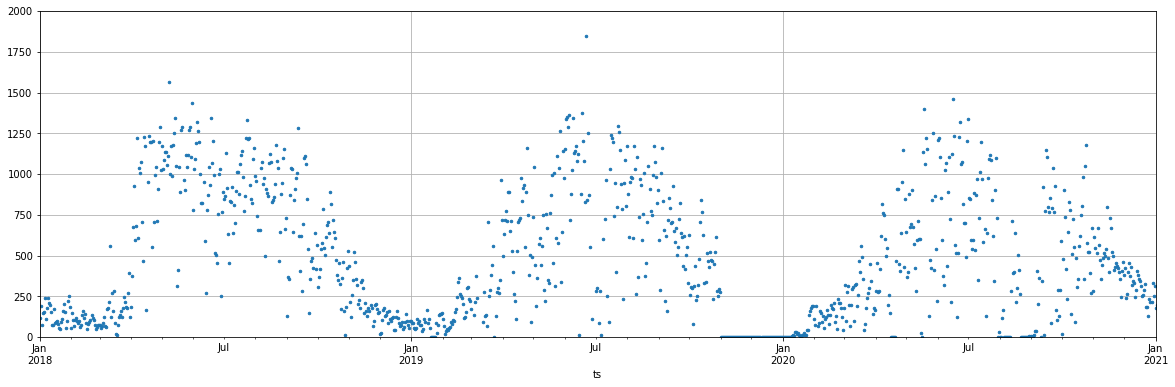

In [20]:
series.plot(**plotconfig);

In [27]:
series.add(another) # series + another

ts
2018-01-01     207.0
2018-01-02     318.0
2018-01-03     134.0
2018-01-04     261.0
2018-01-05     280.0
               ...  
2021-03-23     652.0
2021-03-24    1112.0
2021-03-25    1607.0
2021-03-26    1940.0
2021-03-27     242.0
Length: 1182, dtype: float64

## Indexing data
### Using `loc` - select using `index`

In [33]:
series['2020-12-24']

185.0

In [30]:
series.loc['2019-01-01':'2019-12-31']

ts
2019-01-01    102.0
2019-01-02     89.0
2019-01-03     90.0
2019-01-04     57.0
2019-01-05     48.0
              ...  
2019-12-27      0.0
2019-12-28      0.0
2019-12-29      0.0
2019-12-30      0.0
2019-12-31      0.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 365, dtype: float64

In [31]:
series.loc[[f'{year}-{month:02}-01' for year in range(2018,2021) for month in range(1,13)]]

ts
2018-01-01     115.0
2018-02-01      55.0
2018-03-01      72.0
2018-04-01     188.0
2018-05-01    1171.0
2018-06-01     783.0
2018-07-01     847.0
2018-08-01     987.0
2018-09-01     129.0
2018-10-01     307.0
2018-11-01     438.0
2018-12-01      21.0
2019-01-01     102.0
2019-02-01     111.0
2019-03-01     175.0
2019-04-01     497.0
2019-05-01     739.0
2019-06-01    1153.0
2019-07-01     286.0
2019-08-01    1171.0
2019-09-01     595.0
2019-10-01     625.0
2019-11-01       0.0
2019-12-01       0.0
2020-01-01       0.0
2020-02-01     112.0
2020-03-01     177.0
2020-04-01     286.0
2020-05-01     643.0
2020-06-01    1210.0
2020-07-01    1335.0
2020-08-01       0.0
2020-09-01       8.0
2020-10-01      18.0
2020-11-01     281.0
2020-12-01     379.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), dtype: float64

In [ ]:
series.loc['2020-03-01':'2020-06-01']

In [32]:
series.loc['2021-03-28'] = 450

### Using `iloc` - select by order in the series. Try to avoid.

In [34]:
series.iloc[0]

115.0

In [ ]:
series.iloc[-1]

### subsetting using `mask` - conditional on value of series

In [35]:
series

ts
2018-01-01     115.0
2018-01-02     190.0
2018-01-03      72.0
2018-01-04     149.0
2018-01-05     155.0
               ...  
2021-03-24     668.0
2021-03-25     971.0
2021-03-26    1142.0
2021-03-27     103.0
2021-03-28     450.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1183, dtype: float64

In [ ]:
series.index

<AxesSubplot:xlabel='ts'>

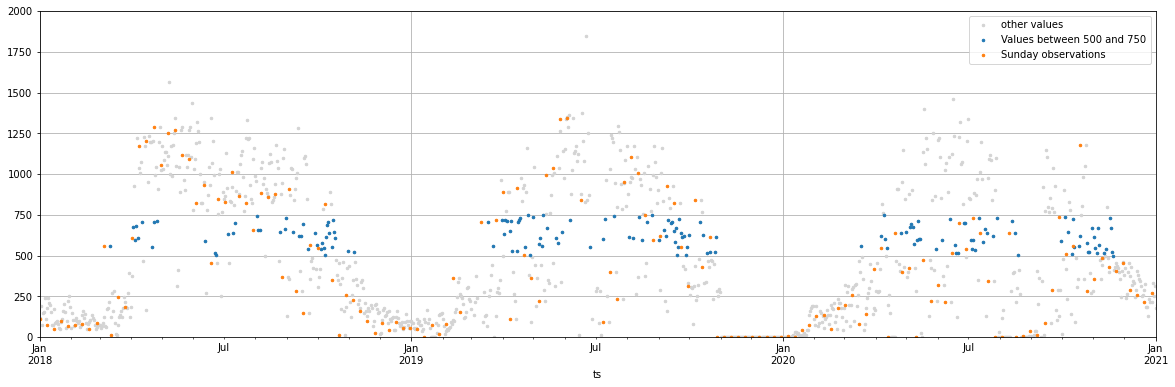

In [45]:
ax = series.plot(color = 'lightgrey',label='other values',legend=True,**plotconfig)
series[(series >= 500) & (series < 750)].plot(ax=ax,label='Values between 500 and 750',legend=True,**plotconfig)
series[series.index.weekday == 6].plot(ax=ax,label='Sunday observations',legend=True,**plotconfig)

In [39]:
series[series>=500]

ts
2018-03-11     560.0
2018-04-03     675.0
2018-04-04     927.0
2018-04-05     593.0
2018-04-06     684.0
               ...  
2021-03-13     510.0
2021-03-14     575.0
2021-03-24     668.0
2021-03-25     971.0
2021-03-26    1142.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 466, dtype: float64

In [37]:
(series >= 500) & (series < 750)

ts
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2021-03-24     True
2021-03-25    False
2021-03-26    False
2021-03-27    False
2021-03-28    False
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1183, dtype: bool

In [42]:
series.index.weekday

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='ts', length=1183)

In [44]:
series[series.index.weekday == 6]

ts
2018-01-07    109.0
2018-01-14     75.0
2018-01-21     53.0
2018-01-28     97.0
2018-02-04     70.0
              ...  
2021-02-28    612.0
2021-03-07    829.0
2021-03-14    575.0
2021-03-21    253.0
2021-03-28    450.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 169, dtype: float64

## `pd.DataFrame()` - 2D, more `pd.Series`

In [48]:
another

ts
2018-01-01     92.0
2018-01-02    128.0
2018-01-03     62.0
2018-01-04    112.0
2018-01-05    125.0
              ...  
2021-03-23    281.0
2021-03-24    444.0
2021-03-25    636.0
2021-03-26    798.0
2021-03-27    139.0
Name: (Podolské nábřeží - stezka, z centra (Braník)), Length: 1182, dtype: float64

<AxesSubplot:xlabel='ts'>

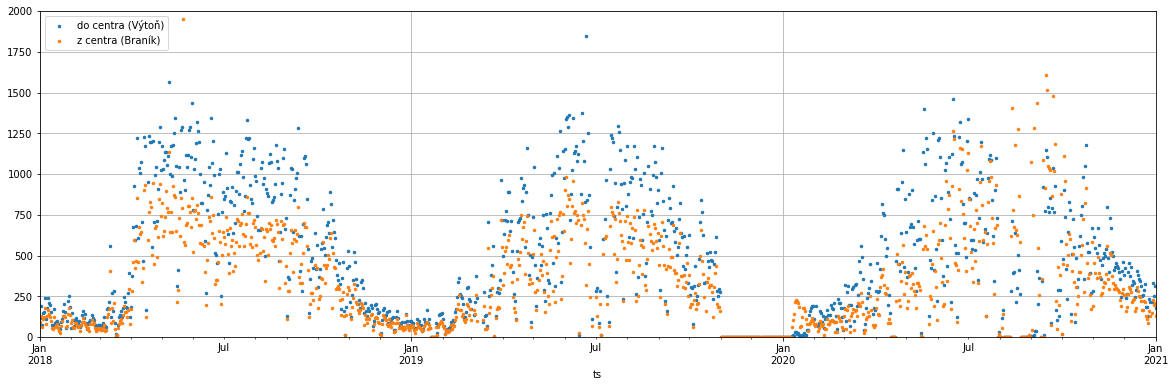

In [49]:
df = pd.DataFrame([series,another]).T
df.columns = [col[1] for col in df.columns]
df.plot(**plotconfig)

In [55]:
pd.DataFrame({ser.name:ser for ser in [series,another]})

Podolské nábřeží - stezka                  
                   do centra (Výtoň) z centra (Braník)
ts                                                    
2018-01-01                     115.0              92.0
2018-01-02                     190.0             128.0
2018-01-03                      72.0              62.0
2018-01-04                     149.0             112.0
2018-01-05                     155.0             125.0
...                              ...               ...
2021-03-24                     668.0             444.0
2021-03-25                     971.0             636.0
2021-03-26                    1142.0             798.0
2021-03-27                     103.0             139.0
2021-03-28                     450.0               NaN

[1183 rows x 2 columns]

## DataFrame construction from raw data:

### row-wise: `list` into `pd.DataFrame`
Each member of the list is one row

* iterable with values
* `pd.Series`
* `dict`

### column-wise `dict` into `pd.DataFrame`
**key** is the column name

**value** is the content

expected key values:
* `list`
* `pd.Series`
* `1D np.array` etc.

In [56]:
df.tail()

,do centra (Výtoň),z centra (Braník)
ts,,
2021-03-24,668.0,444.0
2021-03-25,971.0,636.0
2021-03-26,1142.0,798.0
2021-03-27,103.0,139.0
2021-03-28,450.0,NaN


In [57]:
df.shape

(1183, 2)

In [58]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28'],
              dtype='datetime64[ns]', name='ts', length=1183, freq='D')

In [59]:
df.columns

Index(['do centra (Výtoň)', 'z centra (Braník)'], dtype='object')

In [60]:
df.dtypes

do centra (Výtoň)    float64
z centra (Braník)    float64
dtype: object

Rows are `pd.Series`

In [61]:
df.iloc[0]

do centra (Výtoň)    115.0
z centra (Braník)     92.0
Name: 2018-01-01 00:00:00, dtype: float64

as well as columns

In [ ]:
df['do centra (Výtoň)']

## Deeper look at the index

In [62]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28'],
              dtype='datetime64[ns]', name='ts', length=1183, freq='D')

In [63]:
df.index.values

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', ...,
       '2021-03-26T00:00:00.000000000', '2021-03-27T00:00:00.000000000',
       '2021-03-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
df.index.dtype

dtype('<M8[ns]')

## Dtypes

* Numeric - `int64` and `float64`
* Datetime - `datetime64[ns]`
    * Datetimes can be timezone-aware
    * variable precision

    * see `pd.to_datetime`
* Object - everything else
    * most often `str`
    * But also `list` or virtually anything

* Custom specialized datatypes 
    * `geometry` in `geopandas`

## Path to `MultiIndex`
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [65]:
df

,do centra (Výtoň),z centra (Braník)
ts,,
2018-01-01,115.0,92.0
2018-01-02,190.0,128.0
2018-01-03,72.0,62.0
2018-01-04,149.0,112.0
2018-01-05,155.0,125.0
...,...,...
2021-03-24,668.0,444.0
2021-03-25,971.0,636.0
2021-03-26,1142.0,798.0


In [72]:
detections.index

MultiIndex([('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-20'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-21'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-22'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-23'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-24'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-01'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-02'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-03'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-04'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-05'),
            ...
            (         'Šeberov',             'Šeberov', '2021-03-18'),
            (         'Šeberov',             'Šeberov', '2021-03-19'),
            (         'Šeberov',             'Šeberov', '2021-03-20'),
            (         'Šeberov',             'Šeberov', '2021

In [ ]:
detections.index

In [75]:
detections.loc[('Anděl (Plzeňská)','Plzeňská (z centra)')]

ts
2019-01-20     0.0
2019-01-21     0.0
2019-01-22     0.0
2019-01-23     0.0
2019-01-24     0.0
              ... 
2021-03-23     5.0
2021-03-24    61.0
2021-03-25    66.0
2021-03-26    62.0
2021-03-27     8.0
Name: value, Length: 732, dtype: float64

In [71]:
detections.loc[('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-20')]

0.0

use `pd.IndexSlice` to slice multiindexes

In [73]:
idx = pd.IndexSlice
detections.loc[idx['Anděl (Plzeňská)',:, '2020-03-01':'2020-06-01']]

location          direction              ts        
Anděl (Plzeňská)  Plzeňská (z centra)    2020-03-01    34.0
                                         2020-03-02    89.0
                                         2020-03-03    58.0
                                         2020-03-04    73.0
                                         2020-03-05    81.0
                                                       ... 
                  Štefánikova (centrum)  2020-05-28    27.0
                                         2020-05-29    36.0
                                         2020-05-30    18.0
                                         2020-05-31    10.0
                                         2020-06-01    50.0
Name: value, Length: 186, dtype: float64

## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

### Reshape `Series` into `DataFrame`: `unstack`

In [78]:
detections.index

MultiIndex([('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-20'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-21'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-22'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-23'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-24'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-01'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-02'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-03'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-04'),
            ('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-04-05'),
            ...
            (         'Šeberov',             'Šeberov', '2021-03-18'),
            (         'Šeberov',             'Šeberov', '2021-03-19'),
            (         'Šeberov',             'Šeberov', '2021-03-20'),
            (         'Šeberov',             'Šeberov', '2021

In [81]:
detections.unstack(['location','direction']).columns

MultiIndex([(                     'Anděl (Plzeňská)', ...),
            (                     'Anděl (Plzeňská)', ...),
            (                            'Atletická', ...),
            (                            'Atletická', ...),
            (                    'Barrandovský most', ...),
            (                    'Barrandovský most', ...),
            (                              'Celetná', ...),
            (                              'Celetná', ...),
            (                               'Chodov', ...),
            (                               'Chodov', ...),
            (                      'Císařský ostrov', ...),
            (                      'Císařský ostrov', ...),
            (               'Drážní stezka - Vítkov', ...),
            (               'Drážní stezka - Vítkov', ...),
            (                    'Dukelských hrdinů', ...),
            (                    'Dukelských hrdinů', ...),
            ('Elsnicovo náměstí x U Česk

### `Stack` to `series`

Columns are index-like 

In [84]:
df.stack()

ts                           
2018-01-01  do centra (Výtoň)     115.0
            z centra (Braník)      92.0
2018-01-02  do centra (Výtoň)     190.0
            z centra (Braník)     128.0
2018-01-03  do centra (Výtoň)      72.0
                                  ...  
2021-03-26  do centra (Výtoň)    1142.0
            z centra (Braník)     798.0
2021-03-27  do centra (Výtoň)     103.0
            z centra (Braník)     139.0
2021-03-28  do centra (Výtoň)     450.0
Length: 2335, dtype: float64

## Apply functions on `pd` objects

### Column-wise

In [85]:
detections.mean()

204.93698906544412

In [86]:
detcols = detections.unstack(['location','direction']).median()
detcols.head()

location      Anděl (Plzeňská)                       Atletická          \
direction  Plzeňská (z centra) Štefánikova (centrum)  Ladronka Strahov   
ts                                                                       
2018-01-01                 NaN                   NaN       NaN     NaN   
2018-01-02                 NaN                   NaN       NaN     NaN   
2018-01-03                 NaN                   NaN       NaN     NaN   
2018-01-04                 NaN                   NaN       NaN     NaN   
2018-01-05                 NaN                   NaN       NaN     NaN   

location   Barrandovský most            Celetná                      Chodov  \
direction  Barrandovský most Zlíchov Ovocný trh Prašná brána Chodov centrum   
ts                                                                            
2018-01-01             143.0   179.0       50.0         55.0           32.0   
2018-01-02             106.0   115.0      126.0        137.0           44.0   
2018-01-03              42.0    53.0      143.0         97.0           25.0   
2018-01-04             101.0   112.0      138.0        141.0           36.0   
2018-01-05             111.0   121.0      131.0        116.0           56.0   

location                ... Střešovice          U Českých loděnic             \
direction  ul. Türkova  ...  do centra z centra             Libeň Povltavská   
ts                      ...                                                    
2018-01-01        22.0  ...        3.0      6.0               NaN        NaN   
2018-01-02        18.0  ...       12.0      9.0               NaN        NaN   
2018-01-03        18.0  ...        6.0      6.0               NaN        NaN   
2018-01-04        27.0  ...        9.0     19.0               NaN        NaN   
2018-01-05        32.0  ...       10.0      8.0               NaN        NaN   

location   V Zámcích         Vršovická             Šeberov          
direction    Bohnice Klecany     Nusle Strašnice Kunratice Šeberov  
ts                                                                  
2018-01-01       NaN     NaN      50.0      37.0      31.0    27.0  
2018-01-02       NaN     NaN      52.0      44.0      12.0    10.0  
2018-01-03       NaN     NaN      35.0      29.0       9.0     3.0  
2018-01-04       NaN     NaN      56.0      52.0       4.0     8.0  
2018-01-05       NaN     NaN      54.0      52.0      15.0    14.0  

[5 rows x 71 columns]

In [87]:
detcols.median()

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)       67.0
                   Štefánikova (centrum)     38.0
Atletická          Ladronka                  60.5
                   Strahov                   95.0
Barrandovský most  Barrandovský most        266.0
                                            ...  
V Zámcích          Klecany                  185.0
Vršovická          Nusle                    148.0
                   Strašnice                108.0
Šeberov            Kunratice                 13.0
                   Šeberov                   12.0
Length: 71, dtype: float64

In [90]:
detcols

location      Anděl (Plzeňská)                       Atletická          \
direction  Plzeňská (z centra) Štefánikova (centrum)  Ladronka Strahov   
ts                                                                       
2018-01-01                 NaN                   NaN       NaN     NaN   
2018-01-02                 NaN                   NaN       NaN     NaN   
2018-01-03                 NaN                   NaN       NaN     NaN   
2018-01-04                 NaN                   NaN       NaN     NaN   
2018-01-05                 NaN                   NaN       NaN     NaN   
...                        ...                   ...       ...     ...   
2021-03-23                 5.0                  85.0     136.0   150.0   
2021-03-24                61.0                 110.0     124.0   173.0   
2021-03-25                66.0                 106.0     146.0   162.0   
2021-03-26                62.0                 131.0     155.0   216.0   
2021-03-27                 8.0                  22.0      13.0    20.0   

location   Barrandovský most            Celetná                      Chodov  \
direction  Barrandovský most Zlíchov Ovocný trh Prašná brána Chodov centrum   
ts                                                                            
2018-01-01             143.0   179.0       50.0         55.0           32.0   
2018-01-02             106.0   115.0      126.0        137.0           44.0   
2018-01-03              42.0    53.0      143.0         97.0           25.0   
2018-01-04             101.0   112.0      138.0        141.0           36.0   
2018-01-05             111.0   121.0      131.0        116.0           56.0   
...                      ...     ...        ...          ...            ...   
2021-03-23             222.0   250.0        NaN          NaN           67.0   
2021-03-24             481.0   609.0        NaN          NaN          148.0   
2021-03-25             654.0   863.0        NaN          NaN          183.0   
2021-03-26             787.0  1000.0        NaN          NaN          209.0   
2021-03-27              79.0    95.0        NaN          NaN           20.0   

location                ... Střešovice          U Českých loděnic             \
direction  ul. Türkova  ...  do centra z centra             Libeň Povltavská   
ts                      ...                                                    
2018-01-01        22.0  ...        3.0      6.0               NaN        NaN   
2018-01-02        18.0  ...       12.0      9.0               NaN        NaN   
2018-01-03        18.0  ...        6.0      6.0               NaN        NaN   
2018-01-04        27.0  ...        9.0     19.0               NaN        NaN   
2018-01-05        32.0  ...       10.0      8.0               NaN        NaN   
...                ...  ...        ...      ...               ...        ...   
2021-03-23        74.0  ...        0.0      0.0             320.0      384.0   
2021-03-24       144.0  ...        0.0      0.0             636.0      742.0   
2021-03-25       170.0  ...        0.0      0.0             921.0      992.0   
2021-03-26       194.0  ...        0.0      0.0            1050.0     1245.0   
2021-03-27        18.0  ...        0.0      0.0             133.0      194.0   

location   V Zámcích         Vršovická             Šeberov          
direction    Bohnice Klecany     Nusle Strašnice Kunratice Šeberov  
ts                                                                  
2018-01-01       NaN     NaN      50.0      37.0      31.0    27.0  
2018-01-02       NaN     NaN      52.0      44.0      12.0    10.0  
2018-01-03       NaN     NaN      35.0      29.0       9.0     3.0  
2018-01-04       NaN     NaN      56.0      52.0       4.0     8.0  
2018-01-05       NaN     NaN      54.0      52.0      15.0    14.0  
...              ...     ...       ...       ...       ...     ...  
2021-03-23     200.0   239.0      75.0     110.0       NaN     NaN  
2021-03-24     521.0   631.0     137.0     15

In [92]:
np.mean(detcols[detcols.columns[0]])

70.33644859813084

In [88]:
detcols.apply(np.mean)

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)       70.336449
                   Štefánikova (centrum)     49.929600
Atletická          Ladronka                  81.438224
                   Strahov                   97.960568
Barrandovský most  Barrandovský most        323.343092
                                               ...    
V Zámcích          Klecany                  386.300485
Vršovická          Nusle                    230.102540
                   Strašnice                168.345972
Šeberov            Kunratice                 38.856995
                   Šeberov                   42.633437
Length: 71, dtype: float64

In [93]:
def share_of_missing(col):
    return col[col.isna()].shape[0]/col.shape[0]
detcols.apply(share_of_missing)

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)      0.456853
                   Štefánikova (centrum)    0.471235
Atletická          Ladronka                 0.561760
                   Strahov                  0.463621
Barrandovský most  Barrandovský most        0.075296
                                              ...   
V Zámcích          Klecany                  0.476311
Vršovická          Nusle                    0.100677
                   Strašnice                0.107445
Šeberov            Kunratice                0.183587
                   Šeberov                  0.185279
Length: 71, dtype: float64

In [95]:
detections.unstack(['location','direction'])

location      Anděl (Plzeňská)                       Atletická          \
direction  Plzeňská (z centra) Štefánikova (centrum)  Ladronka Strahov   
ts                                                                       
2018-01-01                 NaN                   NaN       NaN     NaN   
2018-01-02                 NaN                   NaN       NaN     NaN   
2018-01-03                 NaN                   NaN       NaN     NaN   
2018-01-04                 NaN                   NaN       NaN     NaN   
2018-01-05                 NaN                   NaN       NaN     NaN   
...                        ...                   ...       ...     ...   
2021-03-23                 5.0                  85.0     136.0   150.0   
2021-03-24                61.0                 110.0     124.0   173.0   
2021-03-25                66.0                 106.0     146.0   162.0   
2021-03-26                62.0                 131.0     155.0   216.0   
2021-03-27                 8.0                  22.0      13.0    20.0   

location   Barrandovský most            Celetná                      Chodov  \
direction  Barrandovský most Zlíchov Ovocný trh Prašná brána Chodov centrum   
ts                                                                            
2018-01-01             143.0   179.0       50.0         55.0           32.0   
2018-01-02             106.0   115.0      126.0        137.0           44.0   
2018-01-03              42.0    53.0      143.0         97.0           25.0   
2018-01-04             101.0   112.0      138.0        141.0           36.0   
2018-01-05             111.0   121.0      131.0        116.0           56.0   
...                      ...     ...        ...          ...            ...   
2021-03-23             222.0   250.0        NaN          NaN           67.0   
2021-03-24             481.0   609.0        NaN          NaN          148.0   
2021-03-25             654.0   863.0        NaN          NaN          183.0   
2021-03-26             787.0  1000.0        NaN          NaN          209.0   
2021-03-27              79.0    95.0        NaN          NaN           20.0   

location                ... Střešovice          U Českých loděnic             \
direction  ul. Türkova  ...  do centra z centra             Libeň Povltavská   
ts                      ...                                                    
2018-01-01        22.0  ...        3.0      6.0               NaN        NaN   
2018-01-02        18.0  ...       12.0      9.0               NaN        NaN   
2018-01-03        18.0  ...        6.0      6.0               NaN        NaN   
2018-01-04        27.0  ...        9.0     19.0               NaN        NaN   
2018-01-05        32.0  ...       10.0      8.0               NaN        NaN   
...                ...  ...        ...      ...               ...        ...   
2021-03-23        74.0  ...        0.0      0.0             320.0      384.0   
2021-03-24       144.0  ...        0.0      0.0             636.0      742.0   
2021-03-25       170.0  ...        0.0      0.0             921.0      992.0   
2021-03-26       194.0  ...        0.0      0.0            1050.0     1245.0   
2021-03-27        18.0  ...        0.0      0.0             133.0      194.0   

location   V Zámcích         Vršovická             Šeberov          
direction    Bohnice Klecany     Nusle Strašnice Kunratice Šeberov  
ts                                                                  
2018-01-01       NaN     NaN      50.0      37.0      31.0    27.0  
2018-01-02       NaN     NaN      52.0      44.0      12.0    10.0  
2018-01-03       NaN     NaN      35.0      29.0       9.0     3.0  
2018-01-04       NaN     NaN      56.0      52.0       4.0     8.0  
2018-01-05       NaN     NaN      54.0      52.0      15.0    14.0  
...              ...     ...       ...       ...       ...     ...  
2021-03-23     200.0   239.0      75.0     110.0       NaN     NaN  
2021-03-24     521.0   631.0     137.0     15

### Row-wise

In [99]:
def get_max_counter(row):
    recordman = row.idxmax()
    return pd.Series({'location':recordman[0],'direction':recordman[1],'value':row.max()})
detcols.apply(get_max_counter,axis=1)

,location,direction,value
ts,,,
2018-01-01,Modřany,centrum,320.0
2018-01-02,Podolské nábřeží - stezka,do centra (Výtoň),190.0
2018-01-03,Celetná,Ovocný trh,143.0
2018-01-04,Podolské nábřeží - stezka,do centra (Výtoň),149.0
2018-01-05,Podolské nábřeží - stezka,do centra (Výtoň),155.0
...,...,...,...
2021-03-23,Povltavská,ZOO,415.0
2021-03-24,Povltavská,ul. Vodácká,1096.0
2021-03-25,Povltavská,ul. Vodácká,1742.0


## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


* Splitting the data into groups based on some criteria.

* Applying a function to each group independently.

* Combining the results into a data structure.



In [100]:
detections

location          direction            ts        
Anděl (Plzeňská)  Plzeňská (z centra)  2019-01-20    0.0
                                       2019-01-21    0.0
                                       2019-01-22    0.0
                                       2019-01-23    0.0
                                       2019-01-24    0.0
                                                    ... 
Šeberov           Šeberov              2021-03-23    NaN
                                       2021-03-24    NaN
                                       2021-03-25    NaN
                                       2021-03-26    NaN
                                       2021-03-27    NaN
Name: value, Length: 73339, dtype: float64

In [ ]:
def share_of_missing(col,args):
    return col[col.isna()].shape[0]/col.shape[0]

In [106]:
func = lambda col: col[col.isna()].shape[0]/col.shape[0]
func

<function __main__.<lambda>(col)>

In [107]:
detections.groupby(['location','direction']).apply(func)

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)      0.122951
                   Štefánikova (centrum)    0.146175
Atletická          Ladronka                 0.292350
                   Strahov                  0.133880
Barrandovský most  Barrandovský most        0.075296
                                              ...   
V Zámcích          Klecany                  0.044753
Vršovická          Nusle                    0.100677
                   Strašnice                0.107445
Šeberov            Kunratice                0.183587
                   Šeberov                  0.185279
Name: value, Length: 71, dtype: float64

In [102]:
detections.groupby(['location','direction']).median()

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)       67.0
                   Štefánikova (centrum)     38.0
Atletická          Ladronka                  60.5
                   Strahov                   95.0
Barrandovský most  Barrandovský most        266.0
                                            ...  
V Zámcích          Klecany                  185.0
Vršovická          Nusle                    148.0
                   Strašnice                108.0
Šeberov            Kunratice                 13.0
                   Šeberov                   12.0
Name: value, Length: 71, dtype: float64

In [108]:
detections

location          direction            ts        
Anděl (Plzeňská)  Plzeňská (z centra)  2019-01-20    0.0
                                       2019-01-21    0.0
                                       2019-01-22    0.0
                                       2019-01-23    0.0
                                       2019-01-24    0.0
                                                    ... 
Šeberov           Šeberov              2021-03-23    NaN
                                       2021-03-24    NaN
                                       2021-03-25    NaN
                                       2021-03-26    NaN
                                       2021-03-27    NaN
Name: value, Length: 73339, dtype: float64

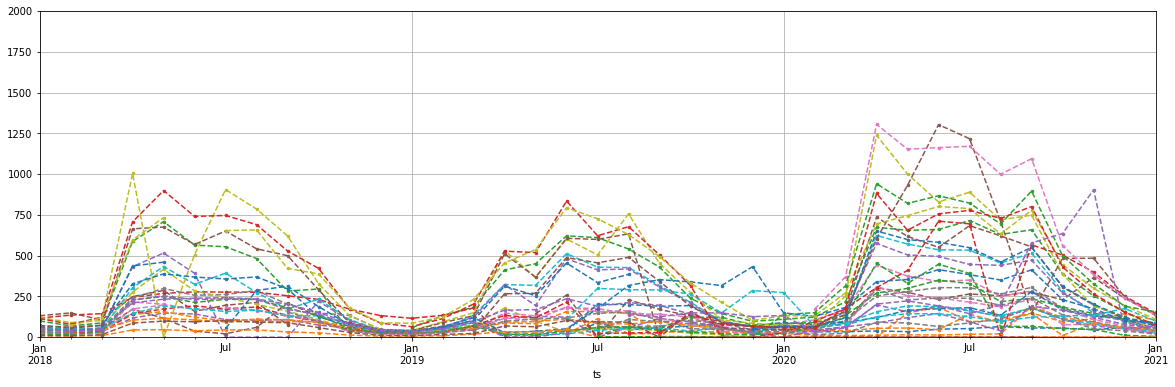

In [111]:
detections.groupby(['location',pd.Grouper(level='ts',freq='1M')]).median().unstack('location').plot(ls='--',legend=False,**plotconfig);

In [114]:
detections.groupby(['location',lambda idx: idx[2].dayofweek]).median().unstack('location').sort_values(by=0,axis=1)

location,Střešovice,Košíře,Šeberov,Radotín,Podbabská,Jeremenkova,Anděl (Plzeňská),Elsnicovo náměstí x U Českých loděnic,Letňany,Chodov,...,Císařský ostrov,Smetanovo nábřeží,Nábřeží Kapitána Jaroše,Celetná,Povltavská,Barrandovský most,U Českých loděnic,Podolské nábřeží - stezka,Rohanské nábřeží,Praha - Podolí
0,0.0,0.0,11.5,44.0,44.0,50.0,59.0,59.5,67.0,68.0,...,167.0,177.0,181.5,185.5,220.0,244.0,252.0,287.5,308.5,396.0
1,0.0,0.0,12.0,53.0,46.0,55.0,64.0,77.5,76.0,73.5,...,187.0,187.0,209.5,202.0,235.0,309.0,244.0,340.5,377.0,450.0
2,0.0,0.0,17.0,53.5,47.0,50.5,68.0,77.0,76.0,78.0,...,184.0,186.5,206.5,178.5,232.5,312.5,284.0,316.0,374.0,559.0
3,0.0,0.0,13.5,60.5,49.0,52.0,73.0,69.5,81.0,72.5,...,188.0,189.5,222.0,201.5,251.0,325.0,305.0,314.5,402.0,612.0
4,0.0,0.0,12.5,51.5,46.0,49.0,60.0,67.0,77.5,70.0,...,186.0,171.5,205.5,187.5,231.0,302.0,264.0,307.0,352.5,500.5
5,0.0,0.0,10.0,62.5,50.0,31.0,28.0,51.5,63.0,59.0,...,188.5,119.0,134.5,116.0,337.5,292.0,224.0,208.5,231.0,566.5
6,0.0,0.0,13.0,63.0,54.0,36.0,25.0,52.5,81.5,67.5,...,206.0,97.0,132.5,92.5,379.0,336.5,310.0,262.0,245.0,501.0


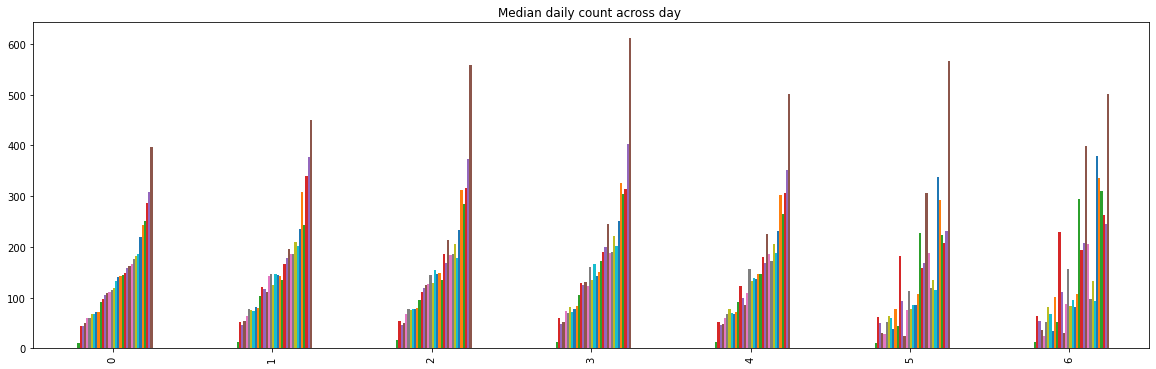

In [115]:
detections.groupby(['location',lambda idx:idx[2].dayofweek]).median().unstack(0).sort_values(by=0,axis=1).plot.bar(legend=False,figsize=(20,6),title='Median daily count across day ');

In [ ]:
detections[detections.index.get_level_values('ts').month.isin([3,4,5,6,7,8,9,10])].dropna().groupby([lambda idx: idx[2].year,lambda idx: idx[2].week]).median().unstack(0).plot(title='Mediánový počet průjezdů v daném týdnu v roce (pouze březen - říjen)',figsize=(20,6),grid=True)

### Group by and Apply - Number of missing values per group and per month

<AxesSubplot:xlabel='location'>

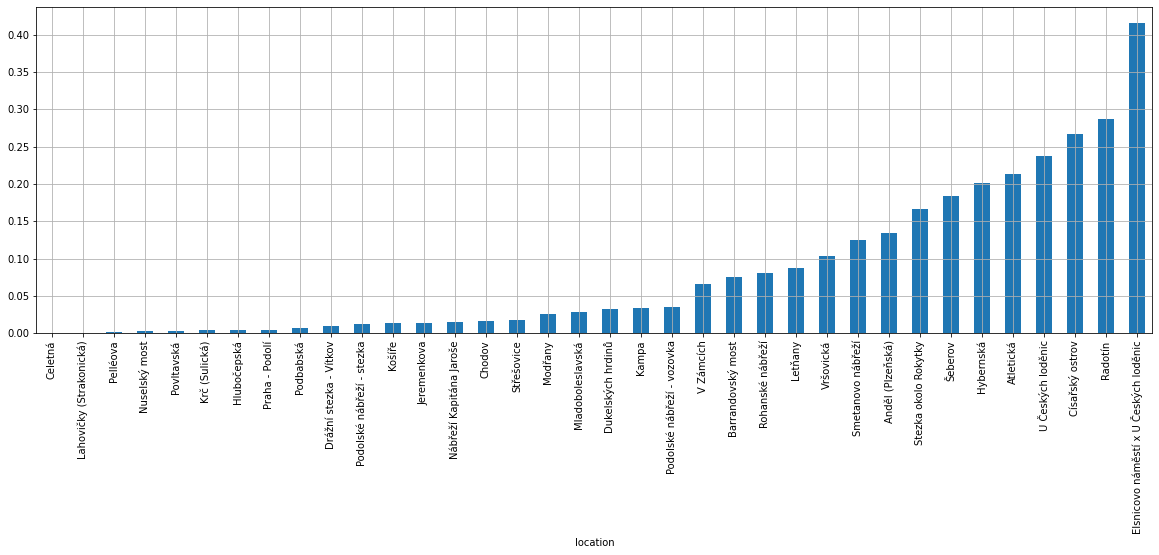

In [116]:
def share_of_missing_values(g):
    return 1-(g.dropna().shape[0]/g.shape[0])

detections.groupby(['location']).apply(share_of_missing_values).sort_values().plot.bar(figsize=(20,6),grid=True)

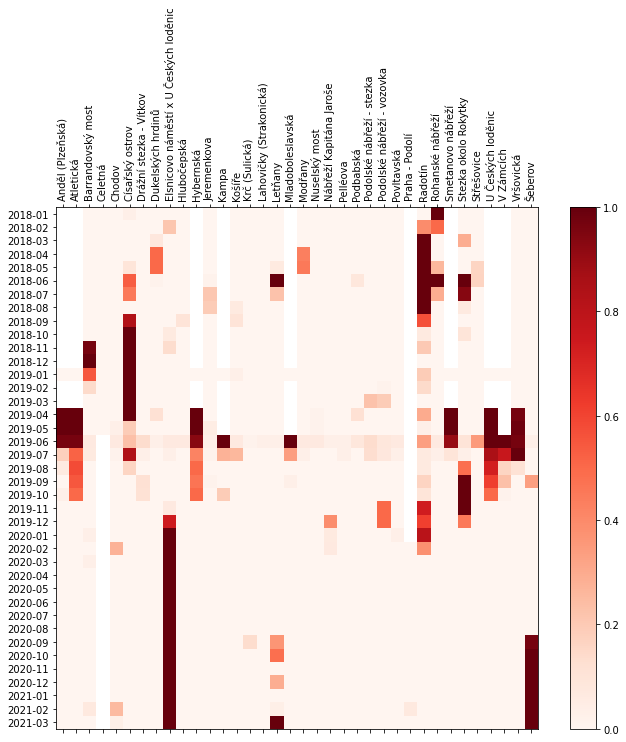

In [117]:
missing = detections.groupby(['location',pd.Grouper(level='ts',freq='1M')]).apply(share_of_missing_values).unstack('location')

fig, ax = plt.subplots(1,1,figsize=(10,10))
img = ax.matshow(missing,cmap='Reds')

ax.set_yticks(range(len(missing.index)))
ax.set_yticklabels(missing.index.strftime('%Y-%m'))

ax.set_xticks(range(len(missing.columns)))
ax.set_xticklabels(missing.columns,rotation=90)
fig.colorbar(img)
fig.tight_layout()

## Merging and joining datasets
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - vertical alignment (along index)
* `pd.merge` - horizontal alignment (along columns, by )
    * `df.join` - merge on index


### Concatenate

![Concatenating schema](./img/concat.png)

### Merge
![Concatenating schema](./img/merge.png)

## Join

## Time-series 

In [ ]:
detections.groupby(['location','direction']).apply(lambda g:g.pct_change()).unstack(['location','direction'])

## Rolling

## Input-Output

In [ ]:
?pd.read_csv

In [ ]:
?pd.read_*

## Plotting with Matplotlib